In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [5]:
# Example dataset (replace with your project dataset)
data = pd.read_csv("house_prices.csv")

# Selecting numeric features for clustering
features = data.select_dtypes(include=[np.number]).dropna()


In [6]:

# Preprocess
features = data.select_dtypes(include=['float64', 'int64']).dropna()
scaled = StandardScaler().fit_transform(features)

In [7]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

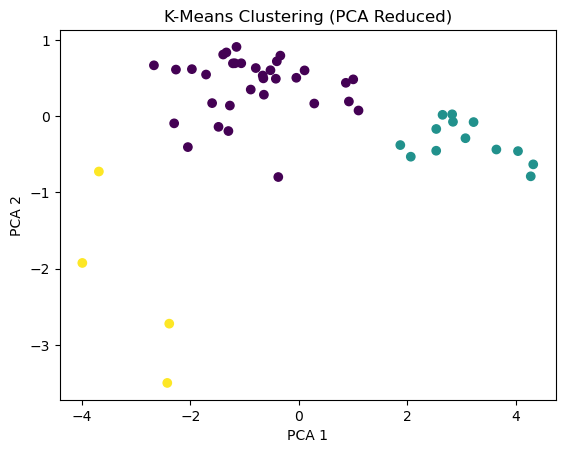

In [9]:
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()